# Límites y continuidad en Python

Esta sección pretende ser un compendio (esperemos que claro y ordenado) de todo el `Python` 
que hemos ido usando en el Capítulo 2. 

**Objetivos:**

- Explorar el dominio, singularidades y rango de una función.
- Cálculo de límites en una y varias variables.
- Análisis de la continuidad de una función.

## Dominio y rango de una función de varias variables

Para calcular el dominio de una función, se puede, en primer lugar, calcular las singularidades de una función dada. 

En la implementación del módulo `Sympy` únicamente está disponible este cálculo para funciones de tipo racional y con dependencia de una única variable. 

Si tenemos esto en cuenta, el dominio de la función vendrá dado por el conjunto de puntos del espacio excepto las singularidades. Para el caso de varias variables, este análisis sólo se puede hacer con respecto a una de las variables, tomando como fijas el resto. 

De la misma manera que lo que ocurre con las singularidades, `Sympy` solamente es capaz de calcular el rango de funciones de una variable. 
Debemos aceptar esta limitación (al menos, a la espera de alguna nueva versión que soluciones el problema), pero, de todos modos, es posible explorar el rango 
de una función de varias variables restringiendo los valores de los argumentos a ciertos planos cartesianos y analizando el rango de la función resultante (ya de una variable).  

Por lo tanto, como resumen: 

* `sp.calculus.singularities(f(x,y), x)`: Cálculo de las singularidades de la función (Lambda) $f$, respecto a $x$ (es decir, dejando fija la $y$). 
    Por supuesto, análogo respecto a la otra variable.
*  `sp.calculus.util.function_range(f(x,1), x, sp.Reals)`: Tal como está escrito, realizaría el cálculo del rango de $f(x,1)$ dejando variar la variable $x$. 

In [1]:
import sympy as sp

import sympy as sp

x = sp.Symbol('x', real = True)
y = sp.Symbol('y', real = True)

f_exp = sp.sqrt( x**2 + y**2 -9 )/x

f=sp.Lambda((x,y), f_exp)
print("Singularidades respecto x: ", sp.calculus.singularities(f(x,y), x))
print("Singularidades respecto y: ", sp.calculus.singularities(f(x,y), y))

Rx = sp.calculus.util.function_range(f(x,1), x, sp.Reals)
Ry = sp.calculus.util.function_range(f(1,y), y, sp.Reals)
Ryn = sp.calculus.util.function_range(f(-1,y), y, sp.Reals)
display(Rx)
display(Ry)
display(Ryn)

Singularidades respecto x:  {0}
Singularidades respecto y:  EmptySet


Interval.open(-1, 1)

Interval(0, oo)

Interval(-oo, 0)

## Graficación de curvas de nivel y barras de colores

Mostramos a continuación un *script* para graficar tanto las curvas de nivel (`contour`) como las barras de colores (`contourf`) para una función de dos variables.

Aquí podéis encontrar una descripción completa de estas funciones, con todas las opciones disponibles: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

N = 50  # 50 puntos en cada dirección dos eixes cartesianos
x = np.linspace(-2, 2, N)
y = np.linspace(-4, 4, N)

X, Y = np.meshgrid(x, y)
f_exp = np.sqrt(16 - 4*X**2 - Y**2)
# Va a dar un warning porque hay puntos en la malla (por ej., el (-2,4)) 
# que ocasionan un negativo en la raíz

# Curvas de nivel
p = plt.contour(X, Y, f_exp)
plt.clabel(p) # Añade el valor numérico de cada curva de nivel
# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-4,4)
plt.show()

# Colores sobre el dominio
p = plt.contourf(X, Y, f_exp)
plt.colorbar()  # Añade la barra de colores con los valores asociados
# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-4,4)
plt.show()

## Superficies de nivel

Ahora mostramos cómo graficar las superficies de nivel. 
En este caso, y a modo de ejemplo, dibujaremos la superficie de nivel de altura $C$ para la función $\displaystyle f(x,y,z) =  x^2 + y^2 - z^2$. 

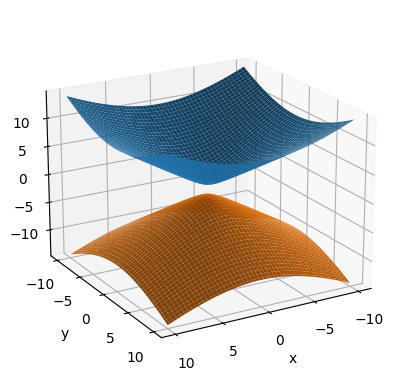

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Inicialización de la representación 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Creación de la nube de puntos (50 puntos en cada eje, x e y) 
N = 100  # 100 puntos en cada dirección dos eixes cartesianos
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(x, y)

C = -1
Z1 = np.sqrt( X**2 + Y**2 - C )
Z2 = -np.sqrt( X**2 + Y**2 - C )

# Representación de la superficie
surf = ax.plot_surface(X, Y, Z1)
surf = ax.plot_surface(X, Y, Z2)
# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Orientamos los ejes
ax.azim = 60
ax.elev = 20
plt.show()

## Cálculo de límites

Para el cálculo de límites en dos variables hemos aprendido a usar el comando `sp.limit` que, de nuevo, sólo permite calcular límites para funciones de una variable.

De todos modos, es perfectamente aplicable para el cálculo de límites por rectas, parábolas, iterados y con cambio a coordenadas polares, como mostramos en el siguiente ejemplo.

De todos modos, ten mucho cuidado al interpretar los resultados, pues no es (¡nimucho menos!) infalible en el análisis de situaciones *atípicas* (verás un ejemplo en la Sección 2.2).

Límites direccionales: 0
Límites por parábolas: 0
Límite iterado empezando en x:  0
Límite iterado empezando en y:  0


'Función en polares:'

r*sin(2*theta)/2

Límite en polares: 0


<IPython.core.display.Javascript object>


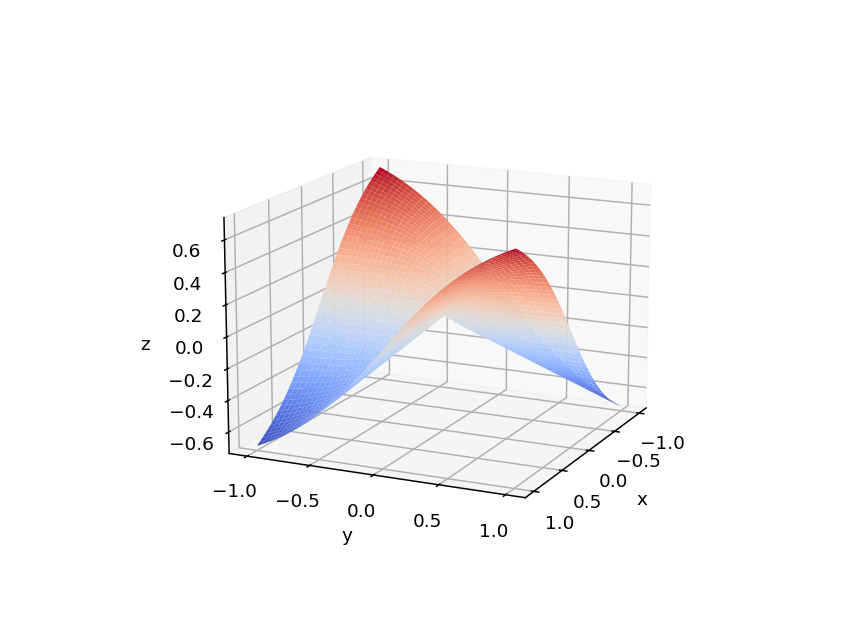

In [1]:
import numpy as np
import sympy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

x, y = sp.symbols('x y', real=True) # definimos las variables simbólicas
f = sp.Lambda((x,y),x*y/sp.sqrt(x**2+y**2)) # definimos la función

# calculamos el límite a través de rectas
m = sp.Symbol('m', real=True)
print('Límites direccionales:',sp.limit(f(x,m*x),x,0)) # todos valen 0

# calculamos el límite a través de parábolas
print('Límites por parábolas:',sp.limit(f(x,m*x**2),x,0)) # todos valen 0

# calculamos los límites iterados
fy = sp.limit(f(x,y),x,0)
print('Límite iterado empezando en x: ',sp.limit(fy,y,0))
fx = sp.limit(f(x,y),y,0)
print('Límite iterado empezando en y: ',sp.limit(fy,x,0))

# calculamos el límite en coordenadas polares
r = sp.Symbol('r', nonnegative=True)
theta = sp.Symbol('theta', real=True)
fpol=f(r*sp.cos(theta), r*sp.sin(theta))
display('Función en polares:',sp.simplify(fpol)) 
# el límite es 0, Caso II del cálculo en polares 
print('Límite en polares:',sp.simplify(sp.limit(fpol,r,0,dir='+'))) 
# restringidos a semirectas valen 0 

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Segunda parte:
#     Visualizamos la función

# Inicialización de la representación 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
fn= sp.lambdify( (x,y) , f(x,y) , "numpy" ) # función numpy de f

# Creación de la nube de puntos (50 puntos en cada eje, x e y) 
xx = np.linspace(-1, 1, 50)
yy = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xx, yy)
Z = fn(X,Y)

# Representación de la superficie
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Orientamos los ejes
ax.azim = 25
ax.elev = 15

plt.show()